In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

(
    yf.pdr_override()
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [3]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

# for time series models
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

#for data preparation and visualization
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
# Datetime
start = dt.datetime(2004, 11, 1)
end = dt.datetime(2023, 10, 31)

In [5]:
# SPY Data
data = pdr.get_data_yahoo("SPY",start,end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Extract daily returns and other relevant features
data['returns'] = data['Adj Close'].pct_change()
data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
data['ma_200'] = data['Adj Close'].rolling(window=200).mean()
data['momentum'] = data['Adj Close'].diff(12)
data['volatility'] = data['Adj Close'].rolling(window=20).std()

In [7]:
data.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['returns', 'ma_50', 'ma_200', 'momentum', 'volatility']], data['Close'], test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import Lasso

# Train Lasso regression model on training data
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [10]:
# Make predictions on testing data
y_pred = lasso.predict(X_test)

In [11]:
# Calculate performance metrics
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)

In [12]:
# Compare performance to benchmark
benchmark = np.mean(y_test)
print('Mean absolute error:', mae)
print('Mean squared error:', mse)
print('Benchmark return:', benchmark)

Mean absolute error: 5.444873951282946
Mean squared error: 52.49374396006014
Benchmark return: 218.7196293438794


In [13]:
y_test

Date
2010-06-03    110.709999
2021-03-01    389.579987
2010-04-29    120.860001
2006-01-09    128.770004
2021-01-13    379.790009
                 ...    
2012-06-11    131.410004
2021-05-11    414.209991
2012-10-11    143.360001
2020-06-22    310.619995
2006-07-12    126.050003
Name: Close, Length: 917, dtype: float64

In [18]:
y_pred = pd.Series(y_pred)

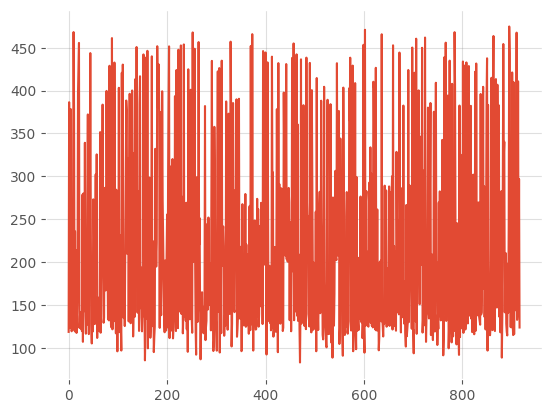

In [19]:
plt.plot(y_pred)

In [15]:
y_pred = np.index_array(y_pred, y_test.index)

AttributeError: module 'numpy' has no attribute 'index_array'

In [ ]:
# Get the indices of the sorted values
sorted_indices = np.argsort(y_test)

# Sort the y_test and y_pred arrays by index
y_test = y_test[sorted_indices]
y_pred = y_pred[sorted_indices]

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Customize the plot
plt.title('S&P 500 Index Predictions')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.show()